## Project 6

In [1]:
# Link: https://github.com/richardasaurus/imdb-pie

# https://jayrambhia.wordpress.com/2012/01/25/fetch-movie-details-from-imdb-using-python-with-proxy/

In [2]:
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
import scipy
import requests
from imdbpie import Imdb
import nltk
import matplotlib.pyplot as plt
import urllib
from bs4 import BeautifulSoup
import nltk
import collections
import re
import csv
import psycopg2
import sys

%matplotlib inline

### Pre-Work: Write a problem statement 

We want to create a recommendation system for users based on the top 25 movies from the IMDB database.

## Part 1: Acquire the Data

#### 1. Connect to the IMDB API

In [3]:
from imdbpie import Imdb
imdb = Imdb()
imdb = Imdb(anonymize=True) # to proxy requests

# Creating an instance with caching enabled
# Note that the cached responses expire every 2 hours or so.
# The API response itself dictates the expiry time)
imdb = Imdb(cache=True)

In [4]:
imdb.search_for_title("The Dark Knight")

[{u'imdb_id': u'tt0468569', u'title': u'The Dark Knight', u'year': u'2008'},
 {u'imdb_id': u'tt1345836',
  u'title': u'The Dark Knight Rises',
  u'year': u'2012'},
 {u'imdb_id': u'tt2313197',
  u'title': u'Batman: The Dark Knight Returns, Part 1',
  u'year': u'2012'},
 {u'imdb_id': u'tt2166834',
  u'title': u'Batman: The Dark Knight Returns, Part 2',
  u'year': u'2013'},
 {u'imdb_id': u'tt1213819', u'title': u'The Dark Knight', u'year': u'1995'},
 {u'imdb_id': u'tt1774602', u'title': u'The Dark Knight', u'year': u'2008'},
 {u'imdb_id': u'tt2258647', u'title': u'The Dark Knight', u'year': u'2011'},
 {u'imdb_id': u'tt2098632',
  u'title': u'Batman: The Dark Knight',
  u'year': u'2008'},
 {u'imdb_id': u'tt2257218',
  u'title': u'The Dark Knight Retires',
  u'year': u'2013'},
 {u'imdb_id': u'tt1265589', u'title': u'Batman Unmasked', u'year': u'2008'},
 {u'imdb_id': u'tt0486410',
  u'title': u'Legends of the Dark Knight: The History of Batman',
  u'year': u'2005'},
 {u'imdb_id': u'tt0486908

In [5]:
imdb.search_for_person("Christian Bale")

[{u'imdb_id': u'nm0000288', u'name': u'Christian Bale'},
 {u'imdb_id': u'nm7635250', u'name': u'Christian Balenciaga'},
 {u'imdb_id': u'nm3577667', u'name': u'Christian Bales'},
 {u'imdb_id': u'nm0160081', u'name': u'Roger Christian'},
 {u'imdb_id': u'nm2530201', u'name': u'Christian Bavle'},
 {u'imdb_id': u'nm1484525', u'name': u'Christian Balz'},
 {u'imdb_id': u'nm4569701', u'name': u'Christian A. Bayle'},
 {u'imdb_id': u'nm1491308', u'name': u'Pale Christian Thomas'},
 {u'imdb_id': u'nm6721313', u'name': u'Jean-Christian Bayle'},
 {u'imdb_id': u'nm6322979', u'name': u'Christian P. Beale'},
 {u'imdb_id': u'nm6338587', u'name': u'Christian Gayle'},
 {u'imdb_id': u'nm5858218', u'name': u'Christian Ball'},
 {u'imdb_id': u'nm3748638', u'name': u'David Christian Ball'},
 {u'imdb_id': u'nm1492166', u'name': u'Christian Blaze'}]

#### 2. Query the top 250 rated movies in the database

In [6]:
imdb250 = imdb.top_250()
imdb250

[{u'can_rate': True,
  u'image': {u'height': 1388,
   u'url': u'http://ia.media-imdb.com/images/M/MV5BODU4MjU4NjIwNl5BMl5BanBnXkFtZTgwMDU2MjEyMDE@._V1_.jpg',
   u'width': 933},
  u'num_votes': 1678989,
  u'rating': 9.3,
  u'tconst': u'tt0111161',
  u'title': u'The Shawshank Redemption',
  u'type': u'feature',
  u'year': u'1994'},
 {u'can_rate': True,
  u'image': {u'height': 500,
   u'url': u'http://ia.media-imdb.com/images/M/MV5BMjEyMjcyNDI4MF5BMl5BanBnXkFtZTcwMDA5Mzg3OA@@._V1_.jpg',
   u'width': 333},
  u'num_votes': 1148746,
  u'rating': 9.2,
  u'tconst': u'tt0068646',
  u'title': u'The Godfather',
  u'type': u'feature',
  u'year': u'1972'},
 {u'can_rate': True,
  u'image': {u'height': 500,
   u'url': u'http://ia.media-imdb.com/images/M/MV5BNDc2NTM3MzU1Nl5BMl5BanBnXkFtZTcwMTA5Mzg3OA@@._V1_.jpg',
   u'width': 333},
  u'num_votes': 785572,
  u'rating': 9,
  u'tconst': u'tt0071562',
  u'title': u'The Godfather: Part II',
  u'type': u'feature',
  u'year': u'1974'},
 {u'can_rate': True,
 

#### 3. Only select the top 25 movies and delete the uncessary rows

In [7]:
imdb25 = imdb250[:25]
imdb25

[{u'can_rate': True,
  u'image': {u'height': 1388,
   u'url': u'http://ia.media-imdb.com/images/M/MV5BODU4MjU4NjIwNl5BMl5BanBnXkFtZTgwMDU2MjEyMDE@._V1_.jpg',
   u'width': 933},
  u'num_votes': 1678989,
  u'rating': 9.3,
  u'tconst': u'tt0111161',
  u'title': u'The Shawshank Redemption',
  u'type': u'feature',
  u'year': u'1994'},
 {u'can_rate': True,
  u'image': {u'height': 500,
   u'url': u'http://ia.media-imdb.com/images/M/MV5BMjEyMjcyNDI4MF5BMl5BanBnXkFtZTcwMDA5Mzg3OA@@._V1_.jpg',
   u'width': 333},
  u'num_votes': 1148746,
  u'rating': 9.2,
  u'tconst': u'tt0068646',
  u'title': u'The Godfather',
  u'type': u'feature',
  u'year': u'1972'},
 {u'can_rate': True,
  u'image': {u'height': 500,
   u'url': u'http://ia.media-imdb.com/images/M/MV5BNDc2NTM3MzU1Nl5BMl5BanBnXkFtZTcwMTA5Mzg3OA@@._V1_.jpg',
   u'width': 333},
  u'num_votes': 785572,
  u'rating': 9,
  u'tconst': u'tt0071562',
  u'title': u'The Godfather: Part II',
  u'type': u'feature',
  u'year': u'1974'},
 {u'can_rate': True,
 

In [8]:
df = pd.DataFrame(imdb25)
df.head()

,can_rate,image,num_votes,rating,tconst,title,type,year
0,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1678989,9.3,tt0111161,The Shawshank Redemption,feature,1994
1,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1148746,9.2,tt0068646,The Godfather,feature,1972
2,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,785572,9.0,tt0071562,The Godfather: Part II,feature,1974
3,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1664146,9.0,tt0468569,The Dark Knight,feature,2008
4,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,859314,8.9,tt0108052,Schindler's List,feature,1993


#### 4. Write the Results to a csv

In [9]:
df.to_csv('imdb.csv') # File located in project 6 starter code

## Part 2: Wrangle the text data

#### 1. Convert the listing identification numbers (tconst) from the first dataframe to a list

In [10]:
df1 = pd.read_csv('/Users/ryangin/Desktop/General_Assembly/DSI_SM_01/projects/01-projects-weekly/project-06/starter-code/imdb.csv')
df1.head()

,Unnamed: 0,can_rate,image,num_votes,rating,tconst,title,type,year
0,0,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1678989,9.3,tt0111161,The Shawshank Redemption,feature,1994
1,1,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1148746,9.2,tt0068646,The Godfather,feature,1972
2,2,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,785572,9.0,tt0071562,The Godfather: Part II,feature,1974
3,3,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1664146,9.0,tt0468569,The Dark Knight,feature,2008
4,4,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,859314,8.9,tt0108052,Schindler's List,feature,1993


In [11]:
list_tconst = df1['tconst'].tolist()
list_tconst

['tt0111161',
 'tt0068646',
 'tt0071562',
 'tt0468569',
 'tt0108052',
 'tt0050083',
 'tt0110912',
 'tt0167260',
 'tt0060196',
 'tt0137523',
 'tt0120737',
 'tt0080684',
 'tt0109830',
 'tt1375666',
 'tt0167261',
 'tt0073486',
 'tt0099685',
 'tt0133093',
 'tt0047478',
 'tt0076759',
 'tt0317248',
 'tt0114369',
 'tt0102926',
 'tt0038650',
 'tt0114814']

#### 2. Scrape the reviews for the top 25 movies

*Hint*: Use a loop to scrape each page at once

In [12]:
IMDB_URL = 'http://www.imdb.com/chart/top?ref_=nv_mv_250_6'
r = requests.get(IMDB_URL)

In [13]:
bs = BeautifulSoup(r.text, "lxml")

In [14]:
# Gets all span tags with class 'titletext'
top25 = bs.select('td.titleColumn')
#main > div > span > div > div > div.lister > table > tbody > tr:nth-child(1) > td.titleColumn
for i in top25[:25]:
    print(i.text)


      1.
      The Shawshank Redemption
(1994)


      2.
      The Godfather
(1972)


      3.
      The Godfather: Part II
(1974)


      4.
      The Dark Knight
(2008)


      5.
      Schindler's List
(1993)


      6.
      12 Angry Men
(1957)


      7.
      Pulp Fiction
(1994)


      8.
      The Lord of the Rings: The Return of the King
(2003)


      9.
      The Good, the Bad and the Ugly
(1966)


      10.
      Fight Club
(1999)


      11.
      The Lord of the Rings: The Fellowship of the Ring
(2001)


      12.
      Star Wars: Episode V - The Empire Strikes Back
(1980)


      13.
      Forrest Gump
(1994)


      14.
      Inception
(2010)


      15.
      The Lord of the Rings: The Two Towers
(2002)


      16.
      One Flew Over the Cuckoo's Nest
(1975)


      17.
      Goodfellas
(1990)


      18.
      The Matrix
(1999)


      19.
      Seven Samurai
(1954)


      20.
      Star Wars: Episode IV - A New Hope
(1977)


      21.
      City of God
(2002)


 

In [15]:
# Gets all span tags with class 'titletext'
ratings = bs.select('strong')
#main > div > span > div > div > div.lister > table > tbody > tr:nth-child(1) > td.titleColumn
for i in ratings[:25]:
    print(i.text)

Go to IMDbPro »
9.2
9.2
9.0
8.9
8.9
8.9
8.9
8.9
8.9
8.8
8.8
8.7
8.7
8.7
8.7
8.7
8.7
8.7
8.6
8.6
8.6
8.6
8.6
8.6


In [16]:
IMDB_URL1 = 'http://www.imdb.com/title/tt0111161/'
r1 = requests.get(IMDB_URL1)

In [17]:
bs1 = BeautifulSoup(r1.text, "lxml")

In [18]:
reviews = bs1.select('p[itemprop="reviewBody"]')
reviews

[<p itemprop="reviewBody"> One of the finest films made in recent years. It's a poignant story about hope. Hope gets me. That's what makes a film like this more than a movie. It tells a lesson about life. Those are the films people talk about 50 or even 100 years from you. It's also a story for freedom. Freedom from isolation,  from rule, from bigotry and hate. Freeman and Robbins are majestic in their performances. Each learns from the other. Their relationship is strong and you feel that from the first moment they make contact with one another. There is also a wonderful performance from legend James Whitmore as Brooks.<br/><br/>He shines when it is his time to go back into the world, only to find that the world grew up so fast he never even got a chance to blink. Stephen King's story is brought to the screen with great elegance and excitement. It is an extraordinary motion that people "will" be talking about in  50 or 100 years.  </p>]

#### 3. Work through each title and find the most common descriptors

*Hint*: "soup" from BeautifulSoup is the html returned from all 25 pages. You'll need to either address each page individually or break them down by elements

In [19]:
titleList = list_tconst

In [20]:
MovieList = []

for i in titleList:
    title3 = imdb.get_title_by_id(i)
    user2 = imdb.get_title_reviews(i,max_results = 2)       
    
    listofDicts=[]
    for user in user2:
        userDict = {
#             "username" : user.username,
#             "user_score" : user.user_score,
#             "user_score_count" : user.user_score_count,
#             "location" : user.user_location,
#             "rating" : user.rating, 
            "review_description" : user.text,            
        }        
    
        listofDicts.append(userDict)
    
    MovieInfo = {
        "title": title3.title,
        "year" : title3.year,
        "rating": title3.rating,
        "total_votes" : title3.votes,
        "reviews" : listofDicts,
    }
    
    MovieList.append(MovieInfo)

In [21]:
print MovieList

[{'total_votes': 1679011, 'rating': 9.3, 'year': 1994, 'reviews': [{'review_description': u'Why do I want to write the 234th comment on The Shawshank Redemption? I am not sure - almost everything that could be possibly said about it has been said. But like so many other people who wrote comments, I was and am profoundly moved by this simple and eloquent depiction of hope and friendship and redemption. \n\nThe only other movie I have ever seen that effects me as strongly is To Kill a Mockingbird. Both movies leave me feeling cleaner for having watched them.\n\nI didn\'t intend to see this movie at all: I do not like prison movies and I don\'t normally watch them. I work at a branch library and one day as I was checking The Shawshank Redemption out to one of our older patrons, she said to me, "Whenever I feel down or depressed, I check out this movie and watch it and it always makes me feel better." At the time, I thought that was very strange. One day there was nothing on TV except thin

In [22]:
Movies25 = pd.DataFrame.from_dict(MovieList, orient='columns')
Movies25

,rating,reviews,title,total_votes,year
0,9.3,[{u'review_description': u'Why do I want to wr...,The Shawshank Redemption,1679011,1994
1,9.2,[{u'review_description': u'Rather than concent...,The Godfather,1148771,1972
2,9.0,[{u'review_description': u' This movie is way ...,The Godfather: Part II,785589,1974
3,9.0,[{u'review_description': u'We've been subjecte...,The Dark Knight,1664161,2008
4,8.9,"[{u'review_description': u'I know many of you,...",Schindler's List,859321,1993
5,8.9,[{u'review_description': u' An excellent court...,12 Angry Men,444196,1957
6,8.9,[{u'review_description': u'One of the early sc...,Pulp Fiction,1316063,1994
7,8.9,[{u'review_description': u' Peter Jackson has ...,The Lord of the Rings: The Return of the King,1208149,2003
8,8.9,[{u'review_description': u' A sprawling Wester...,"The Good, the Bad and the Ugly",500308,1966
9,8.8,[{u'review_description': u' When I first saw t...,Fight Club,1338146,1999


In [23]:
for movie in Movies25['reviews']:
    Reviews25= pd.DataFrame.from_dict(movie, orient='columns')

#### 4. Convert to a string and remove the non AlphaNumeric characters

*Hint*: Use regular expressions!

In [24]:
re.compile('[^a-z A-Z0-9]')

re.compile(r'[^a-z A-Z0-9]')

#### 5. Tokenize the Output

In [25]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(Reviews25['review_description'])
print 'Unique Tokens:'
print len(cvec.get_feature_names())

Unique Tokens:
223


#### 6. Convert to a Dataframe for Easy Viewing

In [26]:
tokens = pd.DataFrame(cvec.transform(Reviews25['review_description']).todense(),
                       columns=cvec.get_feature_names())
tokens

,2000,absolutely,acclaim,acted,acting,admittedly,ah,angles,appearance,appeared,...,unforgettable,unusual,usual,viewing,viewings,watch,went,won,words,worthy
0,0,1,0,1,1,0,1,1,0,0,...,0,1,5,1,0,2,1,1,0,1
1,1,0,1,1,0,1,0,0,1,1,...,1,0,2,0,1,1,0,0,1,0


####  7. Find the rows with the top five descriptive words

In [27]:
words = ('best', 'hope', 'love', 'beautiful', 'great')

## Part 3: Combine Tables in PostgreSQL

#### 1. Import your two .csv data files into your Postgres Database as two different tables

For ease, we can call these table1 and table2

In [28]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sqlalchemy import create_engine

In [29]:
table1 = pd.read_csv('/Users/ryangin/Desktop/General_Assembly/DSI_SM_01/projects/01-projects-weekly/project-06/starter-code/imdb.csv')
table1.head()

,Unnamed: 0,can_rate,image,num_votes,rating,tconst,title,type,year
0,0,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1678989,9.3,tt0111161,The Shawshank Redemption,feature,1994
1,1,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1148746,9.2,tt0068646,The Godfather,feature,1972
2,2,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,785572,9.0,tt0071562,The Godfather: Part II,feature,1974
3,3,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1664146,9.0,tt0468569,The Dark Knight,feature,2008
4,4,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,859314,8.9,tt0108052,Schindler's List,feature,1993


In [30]:
table2 = pd.read_csv('/Users/ryangin/Desktop/General_Assembly/DSI_SM_01/projects/01-projects-weekly/project-06/assets/data/sentiment table.csv')
table2.head()

,title,excellent,great,love,beautiful,best,hope,groundbreaking,amazing
0,The Shawshank Redemption,0,1.0,0,NaN,0.0,0,0,1
1,The Godfather,1,1.0,0,0.0,1.0,0,1,0
2,The Godfather: Part II,1,1.0,0,0.0,1.0,0,0,1
3,The Dark Knight,1,1.0,1,0.0,1.0,0,1,1
4,Schindler's List,1,1.0,1,1.0,1.0,1,1,1


#### 2. Connect to database and query the joined set

In [31]:
# !cat mysecrets.py 

In [32]:
import mysecrets as mypass #save mysecrets.py, var password
print mypass.dbname

imdb


In [33]:
engine = create_engine('postgres://%s:%s@%s:%s/%s' % (mypass.username,mypass.password, mypass.host, mypass.port, mypass.dbname))

In [34]:
# table1.to_sql('table_1', con = engine) # Sends the table into the database; can only do this once

In [35]:
# table2.to_sql('table_2', con = engine) # Sends the table into the database; can only do this once

In [36]:
df = pd.read_sql('SELECT * FROM table_1', con = engine) #encoding='utf-8'
df

,index,Unnamed: 0,can_rate,image,num_votes,rating,tconst,title,type,year
0,0,0,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1677486,9.3,tt0111161,The Shawshank Redemption,feature,1994
1,1,1,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1147737,9.2,tt0068646,The Godfather,feature,1972
2,2,2,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,784749,9.0,tt0071562,The Godfather: Part II,feature,1974
3,3,3,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1662731,9.0,tt0468569,The Dark Knight,feature,2008
4,4,4,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,858473,8.9,tt0108052,Schindler's List,feature,1993
5,5,5,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,443702,8.9,tt0050083,12 Angry Men,feature,1957
6,6,6,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1314893,8.9,tt0110912,Pulp Fiction,feature,1994
7,7,7,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1207120,8.9,tt0167260,The Lord of the Rings: The Return of the King,feature,2003
8,8,8,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,499884,8.9,tt0060196,"The Good, the Bad and the Ugly",feature,1966
9,9,9,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1336777,8.9,tt0137523,Fight Club,feature,1999


In [37]:
df1 = pd.read_sql('SELECT * FROM table_2', con = engine) #encoding='utf-8'
df1

,index,title,excellent,great,love,beautiful,best,hope,groundbreaking,amazing
0,0,The Shawshank Redemption,0,1.0,0,NaN,0.0,0,0,1
1,1,The Godfather,1,1.0,0,0.0,1.0,0,1,0
2,2,The Godfather: Part II,1,1.0,0,0.0,1.0,0,0,1
3,3,The Dark Knight,1,1.0,1,0.0,1.0,0,1,1
4,4,Schindler's List,1,1.0,1,1.0,1.0,1,1,1
5,5,Angry Men,1,NaN,0,0.0,0.0,0,0,0
6,6,Pulp Fiction,0,0.0,0,0.0,0.0,0,1,0
7,7,The Lord of the Rings: The Return of the King,1,0.0,0,1.0,0.0,0,0,1
8,8,"The Good, the Bad and the Ugly",0,0.0,0,0.0,0.0,1,1,0
9,9,Fight Club,0,1.0,0,0.0,NaN,1,0,0


#### 3. Join the two tables 

In [38]:
JOIN = pd.read_sql('SELECT table_1."title", table_2."excellent", table_2."great", table_2."love", table_2."beautiful",\
                   table_2."best", table_2."hope", table_2."groundbreaking", table_2."amazing", table_1."rating"\
    FROM table_1\
    JOIN table_2\
    ON table_1."index"=table_2."index";',con=engine)
JOIN

,title,excellent,great,love,beautiful,best,hope,groundbreaking,amazing,rating
0,The Shawshank Redemption,0,1.0,0,NaN,0.0,0,0,1,9.3
1,The Godfather,1,1.0,0,0.0,1.0,0,1,0,9.2
2,The Godfather: Part II,1,1.0,0,0.0,1.0,0,0,1,9.0
3,The Dark Knight,1,1.0,1,0.0,1.0,0,1,1,9.0
4,Schindler's List,1,1.0,1,1.0,1.0,1,1,1,8.9
5,12 Angry Men,1,NaN,0,0.0,0.0,0,0,0,8.9
6,Pulp Fiction,0,0.0,0,0.0,0.0,0,1,0,8.9
7,The Lord of the Rings: The Return of the King,1,0.0,0,1.0,0.0,0,0,1,8.9
8,"The Good, the Bad and the Ugly",0,0.0,0,0.0,0.0,1,1,0,8.9
9,Fight Club,0,1.0,0,0.0,NaN,1,0,0,8.9


#### 4. Select the newly joined table and save two copies of the into dataframes

In [39]:
imdb_joined = JOIN.copy()

In [40]:
imdb_joined2 = JOIN.copy()

## Part 4: Parsing and Exploratory Data Analysis

#### 1. Rename the column headings

In [41]:
imdb_joined

,title,excellent,great,love,beautiful,best,hope,groundbreaking,amazing,rating
0,The Shawshank Redemption,0,1.0,0,NaN,0.0,0,0,1,9.3
1,The Godfather,1,1.0,0,0.0,1.0,0,1,0,9.2
2,The Godfather: Part II,1,1.0,0,0.0,1.0,0,0,1,9.0
3,The Dark Knight,1,1.0,1,0.0,1.0,0,1,1,9.0
4,Schindler's List,1,1.0,1,1.0,1.0,1,1,1,8.9
5,12 Angry Men,1,NaN,0,0.0,0.0,0,0,0,8.9
6,Pulp Fiction,0,0.0,0,0.0,0.0,0,1,0,8.9
7,The Lord of the Rings: The Return of the King,1,0.0,0,1.0,0.0,0,0,1,8.9
8,"The Good, the Bad and the Ugly",0,0.0,0,0.0,0.0,1,1,0,8.9
9,Fight Club,0,1.0,0,0.0,NaN,1,0,0,8.9


In [42]:
imdb_join = imdb_joined.fillna(0)
imdb_join.head()

,title,excellent,great,love,beautiful,best,hope,groundbreaking,amazing,rating
0,The Shawshank Redemption,0,1.0,0,0.0,0.0,0,0,1,9.3
1,The Godfather,1,1.0,0,0.0,1.0,0,1,0,9.2
2,The Godfather: Part II,1,1.0,0,0.0,1.0,0,0,1,9.0
3,The Dark Knight,1,1.0,1,0.0,1.0,0,1,1,9.0
4,Schindler's List,1,1.0,1,1.0,1.0,1,1,1,8.9


#### 2. Run a description of the data

In [43]:
imdb_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
title             25 non-null object
excellent         25 non-null int64
great             25 non-null float64
love              25 non-null int64
beautiful         25 non-null float64
best              25 non-null float64
hope              25 non-null int64
groundbreaking    25 non-null int64
amazing           25 non-null int64
rating            25 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 2.0+ KB


In [44]:
imdb_join.describe()

,excellent,great,love,beautiful,best,hope,groundbreaking,amazing,rating
count,25.000000,25.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.560000,0.4,0.360000,0.280000,0.280000,0.360000,0.280000,0.320000,8.816000
std,0.506623,0.5,0.489898,0.458258,0.458258,0.489898,0.458258,0.476095,0.179536
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.600000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.700000
50%,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.800000
75%,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.900000
max,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.300000


#### 3. Visualize the Data

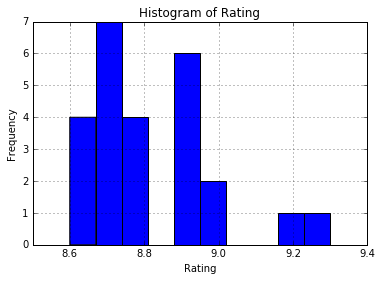

In [45]:
imdb_join.rating.hist()
plt.title('Histogram of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')

In [46]:
median = imdb_join['rating'].median()
median

8.8

In [47]:
imdb_join['rating'] = imdb_join['rating'].map(lambda x: 0 if x <= median else 1)
imdb_join

,title,excellent,great,love,beautiful,best,hope,groundbreaking,amazing,rating
0,The Shawshank Redemption,0,1.0,0,0.0,0.0,0,0,1,1
1,The Godfather,1,1.0,0,0.0,1.0,0,1,0,1
2,The Godfather: Part II,1,1.0,0,0.0,1.0,0,0,1,1
3,The Dark Knight,1,1.0,1,0.0,1.0,0,1,1,1
4,Schindler's List,1,1.0,1,1.0,1.0,1,1,1,1
5,12 Angry Men,1,0.0,0,0.0,0.0,0,0,0,1
6,Pulp Fiction,0,0.0,0,0.0,0.0,0,1,0,1
7,The Lord of the Rings: The Return of the King,1,0.0,0,1.0,0.0,0,0,1,1
8,"The Good, the Bad and the Ugly",0,0.0,0,0.0,0.0,1,1,0,1
9,Fight Club,0,1.0,0,0.0,0.0,1,0,0,1


In [48]:
imdb_join.dtypes

title              object
excellent           int64
great             float64
love                int64
beautiful         float64
best              float64
hope                int64
groundbreaking      int64
amazing             int64
rating              int64
dtype: object

In [49]:
imdb_join = imdb_join[['excellent', 'love', 'hope', 'groundbreaking', 'amazing', 'rating']].astype(float) # converts the columns 
imdb_join

,excellent,love,hope,groundbreaking,amazing,rating
0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,1.0
3,1.0,1.0,0.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0,0.0,1.0
7,1.0,0.0,0.0,0.0,1.0,1.0
8,0.0,0.0,1.0,1.0,0.0,1.0
9,0.0,0.0,1.0,0.0,0.0,1.0


## Part 5: Build the Decision Tree

#### 1. What is our target attribute? 

We are trying to target the rating by the sentiment analysis of the user reviews.

#### 2. Prepare the data and define the training set

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(imdb_join['rating'])
X = pd.get_dummies(imdb_join.drop('rating', axis=1))

In [51]:
X.head()

,excellent,love,hope,groundbreaking,amazing
0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0


In [52]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

#### 2. Train the Model

In [53]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 3. Set up test data and test the model

In [54]:
# import class, instantiate estimator, fit with training set
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

#### 5. Check the results

In [55]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2, random_state = 1)
# min_samples_split: number of points at a certain branch

dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [56]:
import sklearn.tree
import sklearn.ensemble

score = sklearn.cross_validation.cross_val_score(dt, X, y )
print( score )

[ 0.55555556  0.625       0.625     ]


In [57]:
# make predictions
preds = treereg.predict(X_test)

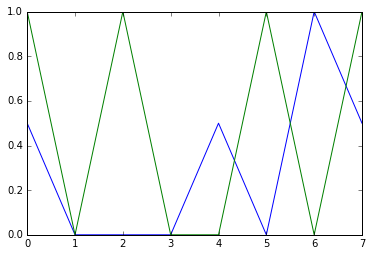

In [58]:
# print predictions and actual values
plt.plot(preds)
plt.plot(y_test)

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

-0.875

Best score: 0.707189084444
Best depth: 2


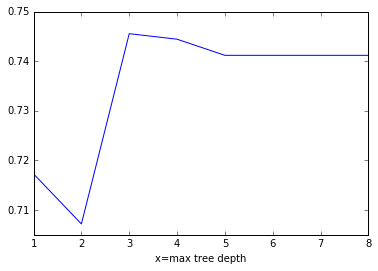

In [60]:
all_scores = []
best_score = -1
best_depth = 0
for i in range(1, 9):
    treereg = DecisionTreeRegressor(max_depth=i, random_state=1)
    scores = cross_val_score(treereg, X, y, cv=3, scoring='mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best depth: %s" % best_depth

# now actually fit the model
treereg = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
treereg.fit(X, y)

plt.figure()
plt.plot(range(1, 9), all_scores)
plt.xlabel('x=max tree depth')

In [61]:
# compute the "Gini importance" of each feature: the (normalized) total reduction of MSE brought by that feature
df = pd.DataFrame({'feature':X.columns, 'importance':treereg.feature_importances_})
df

,feature,importance
0,excellent,0.205714
1,love,0.333333
2,hope,0.000000
3,groundbreaking,0.460952
4,amazing,0.000000


In [62]:
# columns = ["excellent", "love", "hope", "groundbreaking", "amazing"]
X

,excellent,love,hope,groundbreaking,amazing
0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0
5,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0,1.0
8,0.0,0.0,1.0,1.0,0.0
9,0.0,0.0,1.0,0.0,0.0


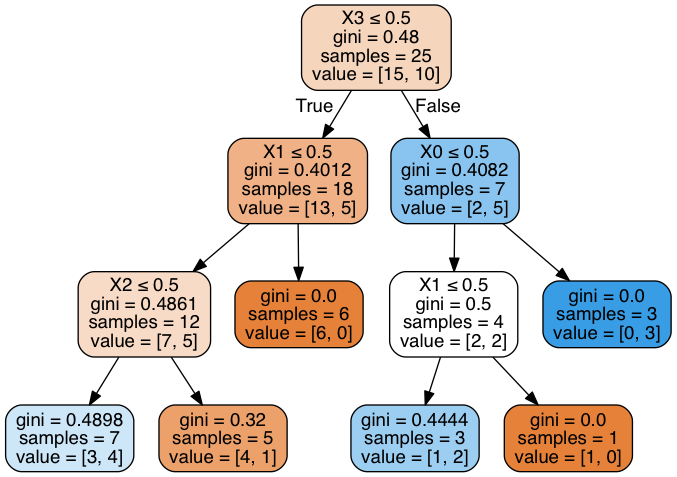

In [63]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,  
#               feature_names=X.columns,  
               filled=True, rounded=True,
               special_characters=True) 
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

#### 6. What is overfitting and how are we at risk? 

Overfitting is when a model fits "too well" to a dataset in that it is unable to account for new data that might be introduced to the dataset. We are at risk when we use decision trees especially because they are "slow learners" by nature and continue to classify every data point. In addition, we have a small dataset so this would attribute to overfitting as well.